In [1]:
import requests
from scrapy.http import TextResponse
from bs4 import BeautifulSoup
import re 
import pandas as pd

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


In [3]:
city = 'Bangalore'
LIMIT = 500

## Data Collection

In [4]:
#change url to find neighbourhoods of city of interest
url = "https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Bangalore"
data = requests.get(url).text
soup = BeautifulSoup(data, 'lxml')
neighborhoods = []
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoods.append(row.text)
neighborhoods = neighborhoods[3:]

In [5]:
print("There are", len(neighborhoods), "neighborhoods in", city)

There are 129 neighborhoods in Bangalore


In [6]:
neighborhoods

['Adugodi',
 'Agara, Bangalore',
 'Ananthnagar',
 'Anjanapura',
 'Arekere',
 'Austin Town',
 'Babusapalya',
 'Bagalur, Bangalore Urban',
 'Bahubalinagar',
 'Banashankari',
 'Banaswadi',
 'Basavanagudi',
 'Basaveshwaranagar',
 'Bellandur',
 'Bharathnagar',
 'Bilekahalli',
 'Bommanahalli',
 'Bommasandra',
 'Brookefield',
 'BTM Layout',
 'Byatarayanapura',
 'Carmelaram',
 'Chamrajpet',
 'Chandapura',
 'Chickpet',
 'Chikkalasandra',
 'Cooke Town',
 'Cox Town, Bangalore',
 'CV Raman Nagar',
 'Dasarahalli',
 'Devarachikkanahalli',
 'Dollars Colony',
 'Domlur',
 'Ejipura',
 'Electronic City',
 'Fraser Town, Bangalore',
 'Gandhi Bazaar',
 'Gandhi Nagar, Bangalore',
 'Ganganagar, Bangalore',
 'Girinagar',
 'Gowdanapalya',
 'Hanumanthanagar, Bengaluru',
 'HBR Layout',
 'Hebbagodi',
 'Hebbal',
 'Hoodi',
 'Horamavu',
 'HSR Layout',
 'Hulimavu',
 'Immadihalli',
 'Indiranagar',
 'Ittamadu',
 'J. P. Nagar',
 'Jakkur',
 'Jalahalli',
 'Jayanagar, Bangalore',
 'Jeevanbheema Nagar',
 'Jigani',
 'Kaggadas

In [7]:
hidden_file = pd.read_csv("credentials.csv")
API_KEY = hidden_file['gcp_id'][0]

In [8]:
import json

latitudes = [] # Initializing the latitude array
longitudes = [] # Initializing the longitude array

for neighborhood in neighborhoods: 
    print(neighborhood)
    place_name = neighborhood + ",Bangalore,India" # Formats the place name
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}'.format(place_name, API_KEY) # Gets the proper url to make the API call
    obj = json.loads(requests.get(url).text) # Loads the JSON file in the form of a python dictionary
    
    results = obj['results'] # Extracts the results information out of the JSON file
    lat = results[0]['geometry']['location']['lat'] # Extracts the latitude value
    lng = results[0]['geometry']['location']['lng'] # Extracts the longitude value
    
    latitudes.append(lat) # Appending to the list of latitudes
    longitudes.append(lng) # Appending to the list of longitudes


Adugodi
Agara, Bangalore
Ananthnagar
Anjanapura
Arekere
Austin Town
Babusapalya
Bagalur, Bangalore Urban
Bahubalinagar
Banashankari
Banaswadi
Basavanagudi
Basaveshwaranagar
Bellandur
Bharathnagar
Bilekahalli
Bommanahalli
Bommasandra
Brookefield
BTM Layout
Byatarayanapura
Carmelaram
Chamrajpet
Chandapura
Chickpet
Chikkalasandra
Cooke Town
Cox Town, Bangalore
CV Raman Nagar
Dasarahalli
Devarachikkanahalli
Dollars Colony
Domlur
Ejipura
Electronic City
Fraser Town, Bangalore
Gandhi Bazaar
Gandhi Nagar, Bangalore
Ganganagar, Bangalore
Girinagar
Gowdanapalya
Hanumanthanagar, Bengaluru
HBR Layout
Hebbagodi
Hebbal
Hoodi
Horamavu
HSR Layout
Hulimavu
Immadihalli
Indiranagar
Ittamadu
J. P. Nagar
Jakkur
Jalahalli
Jayanagar, Bangalore
Jeevanbheema Nagar
Jigani
Kaggadasapura
Kalasipalyam
Kalikanagar
Kalkere
Kalyan Nagar
Kamakshipalya
Kammanahalli
Kengeri
Kodigehalli
Kodihalli, Bangalore
Konanakunte
Koppa gate
Koramangala
Krishnarajapuram
Kumaraswamy Layout
Kundalahalli
Lingarajapuram
Madiwala
Mahade

In [9]:
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans


In [10]:
df = pd.DataFrame()
df['Neighborhood'] = neighborhoods
df['Latitude'] = latitudes
df['Longitude'] = longitudes
df.head()

,Neighborhood,Latitude,Longitude
0,Adugodi,12.942004,77.608304
1,"Agara, Bangalore",12.923065,77.646453
2,Ananthnagar,12.838944,77.689821
3,Anjanapura,12.861652,77.561594
4,Arekere,12.887388,77.596887


## Get regional map of Bangalore using gathered data

In [11]:
#get latitude and longitude of Bangalore
address = 'Bangalore, KA, India'

geolocator = Nominatim(user_agent="in_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


In [12]:
map_blr = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_blr)  
    
map_blr


## Get venues of interest for each region using Foursquare API

In [13]:
credentials = pd.read_csv("credentials.csv")
CLIENT_ID = str(credentials['square_id'][0])
CLIENT_SECRET = str(credentials['square_secret'][0])
VERSION = '20180605' # Foursquare API version

LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
bangalore_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



Adugodi
Agara, Bangalore
Ananthnagar
Anjanapura
Arekere
Austin Town
Babusapalya
Bagalur, Bangalore Urban
Bahubalinagar
Banashankari
Banaswadi
Basavanagudi
Basaveshwaranagar
Bellandur
Bharathnagar
Bilekahalli
Bommanahalli
Bommasandra
Brookefield
BTM Layout
Byatarayanapura
Carmelaram
Chamrajpet
Chandapura
Chickpet
Chikkalasandra
Cooke Town
Cox Town, Bangalore
CV Raman Nagar
Dasarahalli
Devarachikkanahalli
Dollars Colony
Domlur
Ejipura
Electronic City
Fraser Town, Bangalore
Gandhi Bazaar
Gandhi Nagar, Bangalore
Ganganagar, Bangalore
Girinagar
Gowdanapalya
Hanumanthanagar, Bengaluru
HBR Layout
Hebbagodi
Hebbal
Hoodi
Horamavu
HSR Layout
Hulimavu
Immadihalli
Indiranagar
Ittamadu
J. P. Nagar
Jakkur
Jalahalli
Jayanagar, Bangalore
Jeevanbheema Nagar
Jigani
Kaggadasapura
Kalasipalyam
Kalikanagar
Kalkere
Kalyan Nagar
Kamakshipalya
Kammanahalli
Kengeri
Kodigehalli
Kodihalli, Bangalore
Konanakunte
Koppa gate
Koramangala
Krishnarajapuram
Kumaraswamy Layout
Kundalahalli
Lingarajapuram
Madiwala
Mahade

In [14]:
bangalore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adugodi,4,4,4,4,4,4
"Agara, Bangalore",9,9,9,9,9,9
Ananthnagar,2,2,2,2,2,2
Anjanapura,1,1,1,1,1,1
Arekere,24,24,24,24,24,24
Austin Town,2,2,2,2,2,2
BTM Layout,35,35,35,35,35,35
Babusapalya,4,4,4,4,4,4
Bahubalinagar,4,4,4,4,4,4


In [15]:
print('There are {} uniques categories.'.format(len(bangalore_venues['Venue Category'].unique())))

There are 180 uniques categories.


## Analyze and compare neighborhoods

In [16]:
# one hot encoding
blr_onehot = pd.get_dummies(bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
blr_onehot['Neighborhood'] = bangalore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [blr_onehot.columns[-1]] + list(blr_onehot.columns[:-1])
blr_onehot = blr_onehot[fixed_columns]

blr_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,German Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health Food Store,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Inn,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Leather Goods Store,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Optical Shop,Outlet Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Rajasthani Restaurant,Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tibetan Restaurant,Toll Plaza,Toy / Game Store,Train Station,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
blr_grouped = blr_onehot.groupby('Neighborhood').mean().reset_index()
blr_grouped

,Neighborhood,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,German Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health Food Store,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Inn,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Leather Goods Store,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Optical Shop,Outlet Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Rajasthani Restaurant,Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tibetan Restaurant,Toll Plaza,Toy / Game Store,Train Station,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Adugodi,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.250000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,

In [18]:
def kmeans_model(kclusters):
    blr_grouped_clustering = blr_grouped.drop('Neighborhood', 1)
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(blr_grouped_clustering)
    return kmeans

Finding optimal k

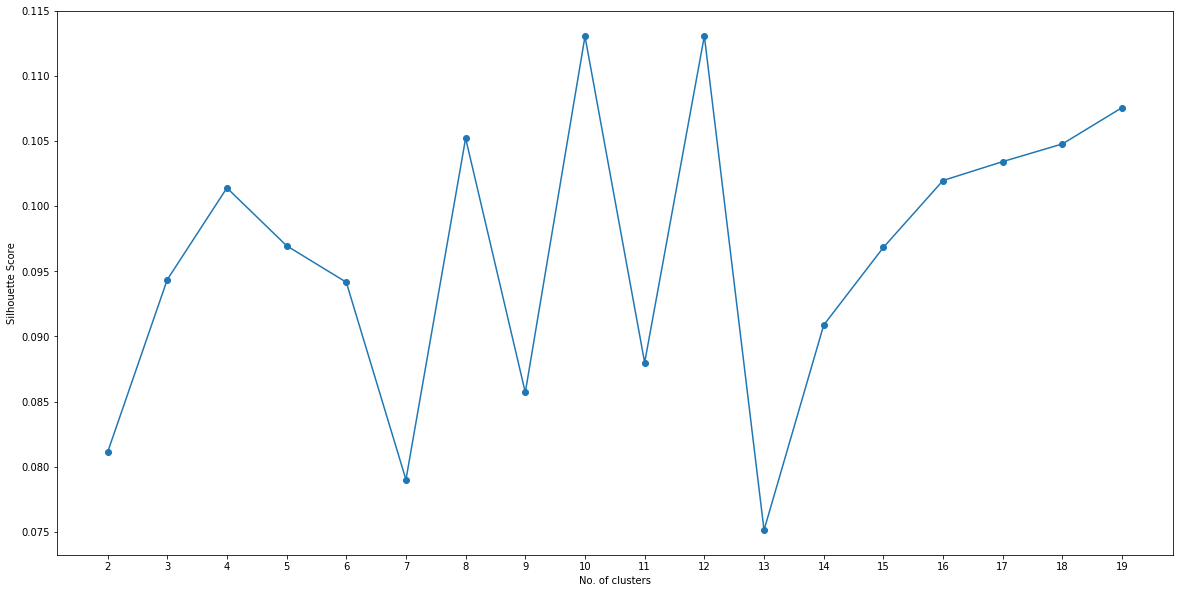

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

blr_grouped_clustering = blr_grouped.drop('Neighborhood', 1)

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
max_range = 20 # Maximum range of clusters
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kgc = blr_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [23]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

12

In [24]:
kmeans = kmeans_model(opt)

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = blr_grouped['Neighborhood']
neighborhoods_venues_sorted.fillna(0, inplace=True)

for ind in np.arange(blr_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Indian Restaurant,Design Studio,Bus Station,Fast Food Restaurant,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market
1,"Agara, Bangalore",Indian Restaurant,Bus Station,Indie Movie Theater,Hyderabadi Restaurant,Italian Restaurant,Fried Chicken Joint,Coffee Shop,Chinese Restaurant,Pizza Place,Asian Restaurant
2,Ananthnagar,Department Store,Grocery Store,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant
3,Anjanapura,ATM,Football Stadium,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Arekere,Indian Restaurant,Sporting Goods Shop,Pizza Place,Bar,Gym / Fitness Center,Liquor Store,Fast Food Restaurant,Mughlai Restaurant,Department Store,Chinese Restaurant


In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

blr_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
blr_merged = blr_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

blr_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,12.942004,77.608304,6.0,Indian Restaurant,Design Studio,Bus Station,Fast Food Restaurant,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market
1,"Agara, Bangalore",12.923065,77.646453,0.0,Indian Restaurant,Bus Station,Indie Movie Theater,Hyderabadi Restaurant,Italian Restaurant,Fried Chicken Joint,Coffee Shop,Chinese Restaurant,Pizza Place,Asian Restaurant
2,Ananthnagar,12.838944,77.689821,10.0,Department Store,Grocery Store,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant
3,Anjanapura,12.861652,77.561594,3.0,ATM,Football Stadium,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Arekere,12.887388,77.596887,0.0,Indian Restaurant,Sporting Goods Shop,Pizza Place,Bar,Gym / Fitness Center,Liquor Store,Fast Food Restaurant,Mughlai Restaurant,Department Store,Chinese Restaurant


In [27]:
blr_merged.fillna(0, inplace=True)

## Clusters

In [28]:
blr_merged.loc[blr_merged['Cluster Labels'] == 0, blr_merged.columns[[0]\
                                                                     + list(range(4, blr_merged.shape[1]))]].reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,"Agara, Bangalore",Indian Restaurant,Bus Station,Indie Movie Theater,Hyderabadi Restaurant,Italian Restaurant,Fried Chicken Joint,Coffee Shop,Chinese Restaurant,Pizza Place,Asian Restaurant
1,4,Arekere,Indian Restaurant,Sporting Goods Shop,Pizza Place,Bar,Gym / Fitness Center,Liquor Store,Fast Food Restaurant,Mughlai Restaurant,Department Store,Chinese Restaurant
2,5,Austin Town,Indie Movie Theater,Tibetan Restaurant,Yoga Studio,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant
3,6,Babusapalya,Pizza Place,Bakery,Park,Intersection,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
4,7,"Bagalur, Bangalore Urban",0,0,0,0,0,0,0,0,0,0
5,8,Bahubalinagar,Indian Restaurant,Vegetarian / Vegan Restaurant,Shopping Mall,Fast Food Restaurant,Electronics Store,Food & Drink Shop,Food,Flea Market,Fish Market,Farmers Market
6,9,Banashankari,Indian Restaurant,Café,Miscellaneous Shop,Fast Food Restaurant,North Indian Restaurant,Clothing Store,Pizza Place,Accessories Store,Art Museum,Falafel Restaurant
7,12,Basaveshwaranagar,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Snack Place,Juice Bar,Burger Joint,Sporting Goods Shop,Gym / Fitness Center,Karnataka Restaurant,Gym
8,13,Bellandur,Shopping Mall,Fast Food Restaurant,Cafeteria,Soccer Field,Yoga Studio,English Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market
9,15,Bilekahalli,Indian Restaurant,Leather Goods Store,Farmers Market,ATM,Travel Agency,Train Station,Food & Drink Shop,Food,Flea Market,Fish Market


In [29]:
blr_merged.loc[blr_merged['Cluster Labels'] == 1, blr_merged.columns[[0] + list(range(4, blr_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Bommasandra,Indian Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
45,Hoodi,Indian Restaurant,Bus Station,Football Stadium,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
69,Koppa gate,Indian Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [30]:
blr_merged.loc[blr_merged['Cluster Labels'] == 2, blr_merged.columns[[0] + list(range(4, blr_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
114,Thindlu,Music Venue,Yoga Studio,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [31]:
blr_merged.loc[blr_merged['Cluster Labels'] == 3, blr_merged.columns[[0] + list(range(4, blr_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Anjanapura,ATM,Football Stadium,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
63,Kamakshipalya,ATM,South Indian Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [32]:
blr_merged.loc[blr_merged['Cluster Labels'] == 4, blr_merged.columns[[0] + list(range(4, blr_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Kalikanagar,Mobile Phone Shop,Yoga Studio,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [33]:
blr_merged.loc[blr_merged['Cluster Labels'] == 5, blr_merged.columns[[0] + list(range(5, blr_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Horamavu,Yoga Studio,English Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant
105,Shikaripalya,Yoga Studio,English Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant


In [34]:
blr_merged.loc[blr_merged['Cluster Labels'] == 6, blr_merged.columns[[0] + list(range(5, blr_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Design Studio,Bus Station,Fast Food Restaurant,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market
10,Banaswadi,Vegetarian / Vegan Restaurant,Kerala Restaurant,Dance Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market
11,Basavanagudi,Bakery,Fast Food Restaurant,Park,Pharmacy,Plaza,Chinese Restaurant,Café,Restaurant,Road
16,Bommanahalli,Department Store,South Indian Restaurant,Gym / Fitness Center,Design Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flea Market
20,Byatarayanapura,Ice Cream Shop,Pizza Place,Gourmet Shop,Bubble Tea Shop,Chinese Restaurant,Department Store,Dessert Shop,Design Studio,Food & Drink Shop
23,Chandapura,Department Store,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
24,Chickpet,Jewelry Store,Miscellaneous Shop,Movie Theater,Restaurant,Dim Sum Restaurant,Diner,Department Store,Food,Flea Market
28,CV Raman Nagar,Coffee Shop,Smoke Shop,Bakery,Gym,Dim Sum Restaurant,Falafel Restaurant,Department Store,Food & Drink Shop,Food
32,Domlur,Café,BBQ Joint,Rajasthani Restaurant,Chinese Restaurant,Sandwich Place,Pizza Place,Art Museum,English Restaurant,Food Court
36,Gandhi Bazaar,Bakery,Fast Food Restaurant,Ice Cream Shop,Park,Sandwich Place,Asian Restaurant,Hookah Bar,Pizza Place,Road


In [35]:
blr_merged.loc[blr_merged['Cluster Labels'] == 7, blr_merged.columns[[0] + list(range(5, blr_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Dollars Colony,Yoga Studio,Electronics Store,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
61,Kalkere,Park,Electronics Store,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [36]:
blr_merged.loc[blr_merged['Cluster Labels'] == 8, blr_merged.columns[[0] + list(range(5, blr_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Ittamadu,Café,Food Truck,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
83,"Murphy Town, Bangalore",Café,Yoga Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant
116,Ulsoor,Burger Joint,Bakery,Yoga Studio,Farmers Market,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market


In [37]:
blr_merged.loc[blr_merged['Cluster Labels'] == 9, blr_merged.columns[[0] + list(range(5, blr_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Immadihalli,Fish Market,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market
111,Sulikunte,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market


In [38]:
blr_merged.loc[blr_merged['Cluster Labels'] == 10, blr_merged.columns[[0] + list(range(5, blr_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ananthnagar,Grocery Store,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant
128,Yeswanthpur,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market


In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_merged['Latitude'], blr_merged['Longitude'], blr_merged['Neighborhood'], blr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters